# EEG During Mental Arithmetic Tasks


## objective: To Classify Active state and Inactive state of the signal using raw EEG dataset

### Dataset:  16 subjects loaded: each subect correspond to 2 file: before arthmetic task(3 min) raw EEG signals and during arthmetic task raw EEG signals(1min)

### Input: 21 features corresponding to 90k rows therefore final dataset size is 90k*21

### output: labels 0, 1 active or inactive respectively

### 3 models were tested in this experiment:

   -1) LSTM MODEL
   -2) BIDIRECTIONAL LSTM 
   -3) LSTM WITH ATTENTION
   


In [1104]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv1D, LSTM , Dense, BatchNormalization, Input, Bidirectional, Dropout
from keras.models import Model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [25]:
subjects= pd.read_csv("/Users/hritvikgupta/Downloads/subject-info.csv")
subjects

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
5,Subject05,16,F,2010,20.71,1
6,Subject06,18,M,2011,4.35,0
7,Subject07,18,F,2012,13.38,1
8,Subject08,26,M,2011,18.24,1
9,Subject09,16,F,2010,7.00,0


## LOADING THE DATASET
#### THE DATASET FORMAT IS IN MNE FORMAT
#### 4 LIST HAVE BEEN CREATED THAT STORES THE DATASET 
#### SUB_RAW_EEG AND SUB_RAW_EEG STORES THE ARRAY DATA OF EACH SUBJECT AND MNE FORMAT DATA RESPECTIVELY FOR THE 3 MIN DATA
#### SIMILARLY SUB_RAW_EEG_AFTER AND SUB_RAW_EEG_AFTER STORE THE ARRAY DATA OF EACH SUBJECT AND MNE FORMAT DATA RESPECTIVELY FOR THE 1 MIN DATA

In [1062]:
No_of_subjects = 16
def load_data(n):
    "FUNCTION RETURNS THE 4 VALUES 2 FOR EACH BEFORE MENTAL ARTHMETIC TASK AND AFTER ARHTMETIC TASK\
     INPUT: NUMBER OF SUBJECTS DATASET TO BE LOADED INTO THE NOTEBOOK\
     OUTPUT : array_list, data  is the 3 min array data and the mne dataset for each subject\
              array_after,data_afte is the 1 min array data and mne dataset for each subject"
    sub_raw_eeg = []
    sub_raw_data =[]
    sub_raw_eeg_after= []
    sub_raw_data_after =[]
    for i in range(n):
        for j in range(2):
            if i<10:
                if j==0:
                    file = "/Users/hritvikgupta/Downloads/"+ "Subject0"+ str(i)+"_"+ str(j+1) + ".edf"
                    data_after= mne.io.read_raw_edf(file)
                    raw_data_after = data_after.get_data()
                    sub_raw_data.append(data_after)
                    sub_raw_eeg.append(raw_data_after.T)
                else:
                    file = "/Users/hritvikgupta/Downloads/"+ "Subject0"+ str(i)+"_"+ str(j+1) + ".edf"
                    data_after= mne.io.read_raw_edf(file)
                    raw_data_after = data_after.get_data()
                    sub_raw_data_after.append(data_after)
                    sub_raw_eeg_after.append(raw_data_after.T)
            else:
                if j==0:
                    file = "/Users/hritvikgupta/Downloads/"+ "Subject"+ str(i)+"_"+ str(j+1) + ".edf"
                    data_after= mne.io.read_raw_edf(file)
                    raw_data_after = data_after.get_data()
                    sub_raw_data.append(data_after)
                    sub_raw_eeg.append(raw_data_after.T)
                else:
                    file = "/Users/hritvikgupta/Downloads/"+ "Subject"+ str(i)+"_"+ str(j+1) + ".edf"
                    data_after= mne.io.read_raw_edf(file)
                    raw_data_after = data_after.get_data()
                    sub_raw_data_after.append(data_after)
                    sub_raw_eeg_after.append(raw_data_after.T)
    return     sub_raw_eeg, sub_raw_data, sub_raw_eeg_after, sub_raw_data_after


array_list,data,array_after,data_after = load_data(No_of_subjects)

Extracting EDF parameters from /Users/hritvikgupta/Downloads/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/hritvikgupta/Downloads/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/hritvikgupta/Downloads/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/hritvikgupta/Downloads/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/hritvikgupta/Downloads/Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/hritvikgupta/Downloads/Subject02_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF paramet

In [556]:
data_resampling(data, 170.5, 16)
data[3].to_data_frame()

,time,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,EEG C3,...,EEG T6,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG
0,0,7.718681,5.913896,5.423319,8.835119,5.893851,9.877030,7.234643,7.732674,5.304332,...,9.662068,10.919837,4.755852,9.598656,5.447699,5.759062,8.119473,4.577504,1.088996,5.805028
1,6,2.263164,1.992290,-0.431128,1.703644,-1.900446,-0.038821,-1.064389,5.597027,-3.190291,...,5.917179,-0.928378,7.272871,5.351853,6.893895,0.627751,-1.100233,2.918239,-1.124750,3.331224
2,12,-3.354068,-3.203585,-6.982553,-5.169886,-9.527727,-9.060255,-9.124386,5.998133,-10.824619,...,8.054153,-10.963187,15.195783,1.121102,15.756083,-5.230207,-8.335164,6.766877,-1.168037,1.377334
3,18,-3.256600,-5.824088,-8.027228,-5.812735,-9.384481,-8.165738,-9.519064,9.352423,-10.709771,...,17.111430,-10.579682,24.837203,-1.978187,29.162477,-6.797721,-7.757907,15.013183,2.007514,1.125199
4,23,1.233131,-4.976039,-3.623105,-3.909852,-4.149931,-4.508405,-6.105880,8.237169,-8.549238,...,16.934400,-11.516365,24.226991,-9.975263,30.004221,-4.431486,-8.862750,14.111482,1.981986,-6.381725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31026,181971,0.000483,0.002728,0.002816,0.005317,0.003290,0.003075,0.002293,0.001724,0.004667,...,0.000129,0.002381,0.000433,-0.000565,0.001974,0.002014,0.002137,-0.001909,-0.000466,-0.068470
31027,181977,0.001508,-0.001654,-0.003246,-0.006626,-0.005739,-0.003961,-0.004942,-0.000112,-0.002969,...,0.001786,0.001782,-0.003097,0.002039,-0.002716,-0.001311,0.000809,0.001607,-0.000548,0.074856
31028,181982,0.000393,0.002705,0.002820,0.005350,0.003337,0.003079,0.002291,0.001705,0.004653,...,0.000118,0.002348,0.000477,-0.000602,0.002040,0.001997,0.002112,-0.001902,-0.000466,-0.069846
31029,181988,0.001598,-0.001631,-0.003250,-0.006659,-0.005786,-0.003966,-0.004939,-0.000093,-0.002956,...,0.001797,0.001815,-0.003142,0.002075,-0.002782,-0.001294,0.000834,0.001600,-0.000548,0.076235


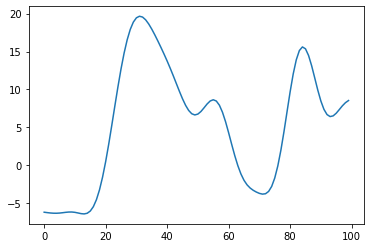

In [488]:
plt.plot(data[0].to_data_frame()['EEG Fp1'][:100])

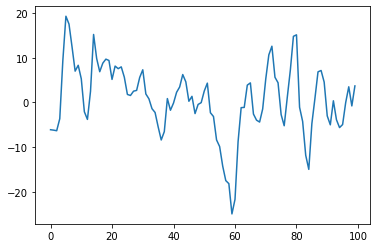

In [492]:
plt.plot(data[0].to_data_frame()['EEG Fp1'][:100])

plt.plot(subject_0['EEG Fp1'][:100])

In [485]:
subject_0_after

,time,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,EEG C3,...,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG,labels
0,0,9.103960,-1.994492,0.162260,0.918141,-4.998249,-1.745284,-1.868288,-2.963282,2.451608,...,0.237369,2.478150,-1.805746,0.291753,0.993595,-0.129729,1.434707,0.540412,-8.411381,1
1,4,2.271327,-3.159144,-3.835617,-0.380889,-8.088060,0.021043,-2.927789,-3.540947,0.265368,...,-0.905044,1.642459,-4.814099,-2.001323,-0.497213,4.336359,0.607670,-0.223565,-8.683138,1
2,8,-5.133085,-3.755521,-7.601411,-1.114351,-11.309233,3.324629,-4.108180,-3.994751,-1.763955,...,-2.066507,0.893883,-7.237824,-3.349135,-1.504859,7.379913,-0.558228,-0.297255,-8.551757,1
3,12,-10.412897,-2.117508,-8.778253,0.013765,-13.134140,8.734622,-4.776426,-4.018430,-2.185979,...,-2.726041,0.530549,-7.218079,-2.209290,-0.681068,6.641278,-1.598183,1.167636,-11.550203,1
4,16,-11.028011,2.154604,-5.892564,3.326021,-12.224113,14.640662,-4.021065,-3.497010,0.000783,...,-2.425469,0.458899,-3.963568,1.314295,2.459253,2.861466,-1.518703,3.760126,-18.227503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,61980,-0.013365,-0.042292,-0.025624,-0.013333,-0.040230,-0.024961,-0.004548,0.017335,-0.009925,...,0.012912,0.005683,0.007073,0.025855,-0.012544,-0.016437,0.006112,0.009949,0.456579,1
15496,61984,0.010186,0.034289,0.021794,0.010670,0.034701,0.020764,0.002560,-0.020481,0.005433,...,-0.011132,-0.009562,-0.005626,-0.024114,0.009366,0.008930,-0.009555,-0.009261,-0.369481,1
15497,61988,-0.000341,0.005329,0.003857,0.002927,0.005006,0.005463,0.000315,-0.006794,-0.000829,...,-0.001463,-0.003874,-0.001069,-0.005117,0.002489,0.002674,-0.002788,0.000960,-0.032663,1
15498,61992,-0.010075,-0.050996,-0.028695,-0.015158,-0.054385,-0.030737,-0.003282,0.040480,-0.004719,...,0.022341,0.015177,0.014218,0.038462,-0.014907,-0.015496,0.014606,0.009888,0.464061,1


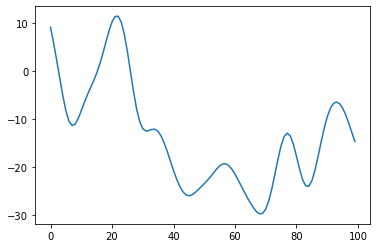

In [483]:
plt.plot(subject_0_after['EEG Fp1'][:100])

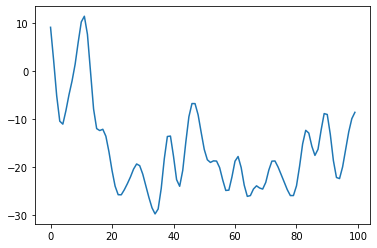

In [486]:
plt.plot(subject_0_after['EEG Fp1'][:100])

In [860]:
data_resampling(data, 170.5, 0, 16)

In [867]:
data[1].to_data_frame()

,time,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,EEG C3,...,EEG T6,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG
0,0,-6.896808,-7.280058,-5.508165,-3.686103,-6.414023,-0.027581,-5.610248,-6.584227,-9.772877,...,-3.109623,-4.933466,-7.034428,-6.860997,-9.200886,-3.245860,-4.095619,-6.356684,-1.844763,-17.307000
1,6,-5.200140,-5.542813,-5.688905,-4.689131,-4.413056,-2.583101,-6.855327,-10.933940,-8.927791,...,-6.172112,-5.640119,-8.765682,-7.368039,-9.858930,-4.139788,-7.246565,-6.333047,0.583245,-27.259980
2,12,-3.002609,-3.306473,-4.423375,-4.697910,-1.921331,-3.834335,-4.159539,-12.528234,-6.183924,...,-6.475390,-4.404376,-8.319603,-4.358662,-8.045266,-4.764852,-7.679235,-3.739866,2.391483,-50.561434
3,18,-2.336114,-2.875175,-2.673075,-2.845441,-1.038470,-2.741896,2.290746,-9.219225,-2.057524,...,-2.653355,-0.793928,-4.681711,2.747249,-3.789939,-5.552913,-3.815301,0.309844,1.755693,-54.977201
4,23,-1.385559,-2.242291,-0.291415,0.956509,-0.378479,1.164817,4.936962,-5.339929,0.761137,...,0.459440,1.261416,-1.470230,6.608129,-1.239628,-3.917760,0.445253,0.906454,-0.158761,-11.024051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31026,181971,0.001976,0.002119,0.001592,0.003382,0.001207,0.009570,0.001553,-0.002147,0.000892,...,0.002596,0.000531,-0.001560,0.002889,0.003121,-0.000576,-0.002978,0.002912,-0.000972,0.067316
31027,181977,0.000825,-0.000945,0.001248,-0.000741,0.001107,-0.004964,0.004564,0.004925,0.000289,...,-0.000610,0.001266,0.000267,-0.000532,-0.000338,-0.000074,0.001580,0.000816,0.000588,-0.060594
31028,181982,0.001934,0.002083,0.001583,0.003360,0.001176,0.009448,0.001486,-0.002172,0.000872,...,0.002572,0.000464,-0.001549,0.002777,0.003049,-0.000563,-0.002972,0.002817,-0.000939,0.065447
31029,181988,0.000867,-0.000909,0.001256,-0.000719,0.001138,-0.004841,0.004630,0.004950,0.000309,...,-0.000586,0.001333,0.000255,-0.000421,-0.000266,-0.000086,0.001573,0.000910,0.000555,-0.058728


## DATA PREPROCESSING
1) DATA RESAMPLLING:-  3 MIN DATA(WHICH IS OF BEFORE ARTHMETIC TASK) IS RESAMPLED INTO THE 1 MIN DATA, THEREFORE  90K ROWS CONVERTED INTO THE 30K
                       
2) DATA LABELLING: RESAMPLED DATA WHIHC IS OF BEFORE ARTHMETIC TASK IS RESAMPLED IS LABELLED 0 AND THE ARTH-MATIC TASK DATA OF 1MIN IS LABELLED 1

3) DATA CONCATATING: BOTH THE DATA OF THE BEFORE ARTHMETIC TASK DATA AND THE AFTER ARTHMETIC TASK DATA IS CONCATED TO FORM THE FINAL DATA THAT IS TO BE FED TO THE MODEL

4) TRAIN_TEST_VALIDATION SPLIT:- USED THE TENSORFLOW DATASET.API FUNCTION TO CREATE THE DATSET.
                                 THEN GIVEN THE SPLIT OF THE 70/15/15
           

In [978]:
def data_resampling(data, sfrq, start, stop):
    "sfreq = sampling_Frequency\
     start and stop is the range of the subject you want to downsample dataset\
     for example from 0 to 16 subjects loaded respectively is downsampled"
    for i in range(start,stop):
        data[i].resample(sfrq).to_data_frame()
    

def data_concat(data_before, data_after, start, stop):
    "input: (before arthmetic task dataframe, after_arthemetic task dataset, start, stop)\
    output : concated labelled data set for n number of subjects"
    frames = []
    
    for i in range(start, stop):
        d_b = data_before[i].to_data_frame()
        d_b['labels'] = 0
        d_a = data_after[i].to_data_frame()
        d_a['labels'] = 1
        frames.append(d_b)
        frames.append(d_a)
    model_input_data = pd.concat(frames)
    
    return model_input_data

In [1073]:
def create_dataset(data, data_after, start, stop, sfreq):
    "input:  data: before arthmetic task mne dataset\
             data_after: during arthmetic task mne dataset\
             start: starting point from where you want to take subjects\
             stop: till were you wanted to take subjects\
    for example: if you wish to take the subjects from the 0th subject to the 16th subject\
    output: train_dataset, test_dataset, X_con(array format of the dataset),y_con(array format of the label), dataframe format of the concated datset"
    
    
    dataframe = data_resampling(data, sfreq, start,stop)
    dataframe = data_concat(data, data_after, start,stop)
    dataframe.drop('time', axis = 1, inplace = True)
    X_con = dataframe.drop('labels', axis = 1)
    y_con = dataframe['labels']
    y_con = np.array(y_con)
    X_con = np.array(X_con)
    print(X_con.shape, y_con.shape)
    dataset = tf.data.Dataset.from_tensor_slices((X_con,y_con))
    dataset = dataset.shuffle(len(dataset))
    Datset_Size = X_con.shape[0]
    train_size = int(0.85*Datset_Size)
    test_size = int(0.15*Datset_Size)
    
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)
    #validation_dataset = remaining_dataset.take(validation_size)
    #test_dataset = remaining_dataset.skip(validation_size)

    train_dataset  = train_dataset.shuffle(len(train_dataset))
    train_dataset = train_dataset.batch(32)

    
    return train_dataset,test_dataset, X_con, y_con, dataframe



In [1074]:
train_dataset, test_dataset, X_con, y_con, dataframe= create_dataset(data, data_after, 0, 16, 170.5)

(991473, 21) (991473,)


In [1065]:
dataframe

,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,EEG C3,EEG C4,...,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG,labels
0,-3.005984,-2.830782,-3.315703,0.190186,-3.207715,-0.719160,-2.443014,3.242821,-2.525838,2.279258,...,-0.985222,4.819438,2.206503,7.884889,0.192554,-3.818521,0.105714,1.642670,9.238842,0
1,-4.909522,-4.979922,-5.712962,-1.153398,-3.892453,-1.517517,0.099585,6.962197,-0.896430,3.791712,...,5.169935,11.600486,8.597156,14.670477,-1.125483,8.575372,8.175737,0.602282,-2.765945,0
2,-6.791289,-6.131153,-9.712450,-3.425286,-4.118303,-0.779045,3.996379,11.414687,0.117528,4.683077,...,11.945900,19.319002,17.474888,22.411214,-3.349668,19.821770,16.488814,-0.233608,-24.926679,0
3,-6.834537,-5.071248,-11.903124,-4.794655,-4.601263,2.053783,6.590749,12.949896,-0.127540,3.908124,...,13.606577,21.495105,23.919082,27.189599,-4.716114,15.191842,17.806110,0.561013,-48.397506,0
4,-5.807639,-4.147401,-10.637694,-5.374189,-4.503584,2.134021,5.924486,9.579009,-1.320895,0.137801,...,8.881596,15.191877,22.147000,24.962090,-5.071133,3.328170,12.668809,1.271985,-62.045450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30995,0.000643,-0.001884,-0.000758,-0.000123,-0.001227,0.000123,0.001188,0.000178,0.001212,0.000931,...,0.000223,0.000310,0.000217,0.001252,0.001336,0.000527,0.000425,-0.000367,0.002146,1
30996,0.000643,-0.001884,-0.000758,-0.000123,-0.001227,0.000123,0.001188,0.000178,0.001212,0.000931,...,0.000223,0.000310,0.000217,0.001252,0.001336,0.000527,0.000425,-0.000367,0.002146,1
30997,0.000643,-0.001884,-0.000758,-0.000123,-0.001227,0.000123,0.001188,0.000178,0.001212,0.000931,...,0.000223,0.000310,0.000217,0.001252,0.001336,0.000527,0.000425,-0.000367,0.002146,1
30998,0.000643,-0.001884,-0.000758,-0.000123,-0.001227,0.000123,0.001188,0.000178,0.001212,0.000931,...,0.000223,0.000310,0.000217,0.001252,0.001336,0.000527,0.000425,-0.000367,0.002146,1


In [1075]:
train_dataset_new= train_dataset.take(int(0.825*len(train_dataset)))
validation_dataset = train_dataset.skip(int(0.825*len(train_dataset)))

In [1067]:
len(train_dataset_new), len(validation_dataset)

(21727, 4609)

In [611]:
shape = X_con.shape[1]
shape

21

## LSTM MODEL 

1. input shape : (number of features, 1) #(21, 1) as there are 21 columns in our raw eeg dataset and 1 label correspond to it we want to predict

2. layers: 
        - 2 Dense layers
        - 3 LSTM layers
        - 1 dense output layer
        

In [1090]:
shape = X_con.shape[1]
def create_model(shape):
    ip = Input(shape =(shape,1))
    Dense1 = Dense(64, activation = 'relu')(ip)
    Dense2 = Dense(128, activation = 'relu')(Dense1)
    lstm_1=  LSTM(256, return_sequences = True)(Dense2)
    drop = tf.keras.layers.Dropout(0.2)(lstm_1)
    lstm_3=  LSTM(256)(drop)
    drop2 = tf.keras.layers.Dropout(0.2)(lstm_3)
    Dense_3= Dense(128, activation = 'relu')(drop2)
    outputs = Dense(1, activation='sigmoid')(Dense_3)

    model = tf.keras.Model(ip, outputs)

    model.compile(optimizer='adam',
                  loss="binary_crossentropy", metrics=["acc"])
    
    return model

In [578]:
model_2 = create_model(shape)

In [579]:
model_2.summary()

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 21, 1)]           0         
_________________________________________________________________
dense_114 (Dense)            (None, 21, 64)            128       
_________________________________________________________________
dense_115 (Dense)            (None, 21, 128)           8320      
_________________________________________________________________
lstm_93 (LSTM)               (None, 21, 256)           394240    
_________________________________________________________________
dropout_32 (Dropout)         (None, 21, 256)           0         
_________________________________________________________________
lstm_94 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0  

In [503]:
model.fit(X_train, y_train, epochs = 50, verbose=1)

Epoch 1/50
578/578 [==============================] - 10s 14ms/step - loss: 0.6683 - acc: 0.5711
Epoch 2/50
578/578 [==============================] - 8s 13ms/step - loss: 0.5546 - acc: 0.7081
Epoch 3/50
578/578 [==============================] - 8s 13ms/step - loss: 0.3903 - acc: 0.8268
Epoch 4/50
578/578 [==============================] - 8s 13ms/step - loss: 0.2848 - acc: 0.8866
Epoch 5/50
578/578 [==============================] - 8s 13ms/step - loss: 0.2318 - acc: 0.9107
Epoch 6/50
578/578 [==============================] - 8s 14ms/step - loss: 0.2036 - acc: 0.9214
Epoch 7/50
578/578 [==============================] - 8s 13ms/step - loss: 0.1745 - acc: 0.9366
Epoch 8/50
578/578 [==============================] - 8s 13ms/step - loss: 0.1749 - acc: 0.9371
Epoch 9/50
578/578 [==============================] - 8s 13ms/step - loss: 0.1450 - acc: 0.9505
Epoch 10/50
578/578 [==============================] - 8s 13ms/step - loss: 0.1336 - acc: 0.9516
Epoch 11/50
578/578 [=================

In [581]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_2.fit(train_dataset, epochs = 10, callbacks=[callback])

Epoch 1/10
18300/18300 [==============================] - 725s 39ms/step - loss: 0.6272 - acc: 0.6358
Epoch 2/10
18300/18300 [==============================] - 301s 16ms/step - loss: 0.4991 - acc: 0.7535
Epoch 3/10
18300/18300 [==============================] - 260s 14ms/step - loss: 0.4364 - acc: 0.7929
Epoch 4/10
18300/18300 [==============================] - 268s 15ms/step - loss: 0.3932 - acc: 0.8191
Epoch 5/10
18300/18300 [==============================] - 276s 15ms/step - loss: 0.3641 - acc: 0.8353
Epoch 6/10
18300/18300 [==============================] - 297s 16ms/step - loss: 0.3448 - acc: 0.8463
Epoch 7/10
18300/18300 [==============================] - 307s 17ms/step - loss: 0.3303 - acc: 0.8541
Epoch 8/10
18300/18300 [==============================] - 312s 17ms/step - loss: 0.3194 - acc: 0.8593
Epoch 9/10
18300/18300 [==============================] - 662s 36ms/step - loss: 0.3125 - acc: 0.8641
Epoch 10/10
18300/18300 [==============================] - 438s 24ms/step - loss: 

In [691]:
model_3 = create_model(shape)
model_3.fit(train_dataset_new, epochs = 10,validation_data = validation_dataset,  callbacks=[callback])

Epoch 1/10
21388/21388 [==============================] - 320s 15ms/step - loss: 0.6679 - acc: 0.5805 - val_loss: 0.6094 - val_acc: 0.6612
Epoch 2/10
21388/21388 [==============================] - 334s 16ms/step - loss: 0.5962 - acc: 0.6741 - val_loss: 0.5465 - val_acc: 0.7160
Epoch 3/10
21388/21388 [==============================] - 334s 16ms/step - loss: 0.5433 - acc: 0.7187 - val_loss: 0.5060 - val_acc: 0.7470
Epoch 4/10
21388/21388 [==============================] - 333s 16ms/step - loss: 0.5057 - acc: 0.7480 - val_loss: 0.4618 - val_acc: 0.7754
Epoch 5/10
21388/21388 [==============================] - 336s 16ms/step - loss: 0.4756 - acc: 0.7667 - val_loss: 0.4408 - val_acc: 0.7919
Epoch 6/10
21388/21388 [==============================] - 336s 16ms/step - loss: 0.4536 - acc: 0.7824 - val_loss: 0.4174 - val_acc: 0.8042
Epoch 7/10
21388/21388 [==============================] - 355s 17ms/step - loss: 0.4353 - acc: 0.7939 - val_loss: 0.4050 - val_acc: 0.8125
Epoch 8/10
21388/21388 [===

In [692]:
model_3.save_weights("/Users/hritvikgupta/Downloads/eeg_model_3val2july.h5")

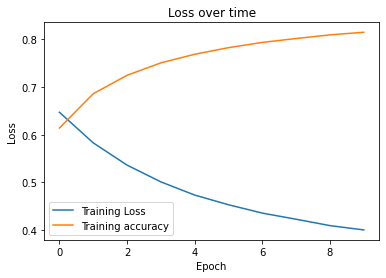

In [693]:
plt.plot(range(10), model_3.history.history['loss'], label="Training Loss")
plt.plot(range(10), model_3.history.history['acc'], label="Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.legend()

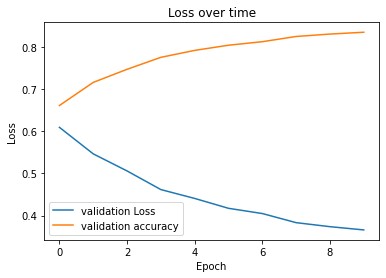

In [695]:
plt.plot(range(10), model_3.history.history['val_loss'], label="validation Loss")
plt.plot(range(10), model_3.history.history['val_acc'], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.legend()

## Bidirectional LSTM model

In [1091]:
shape = X_con.shape[1]
def create_model_bilstm(shape):
    ip = Input(shape =(shape,1))
    Dense1 = Dense(64, activation = 'relu')(ip)
    Dense2 = Dense(128, activation = 'relu')(Dense1)
    lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense2)
    drop = tf.keras.layers.Dropout(0.2)(lstm_1)
    lstm_3=  Bidirectional(LSTM(256))(drop)
    drop2 = tf.keras.layers.Dropout(0.2)(lstm_3)
    Dense_3= Dense(128, activation = 'relu')(drop2)
    outputs = Dense(1, activation='sigmoid')(Dense_3)

    model = tf.keras.Model(ip, outputs)

    model.compile(optimizer='adam',
                  loss="binary_crossentropy", metrics=["acc"])
    
    return model

In [1092]:
model_5 = create_model_bilstm(shape)

In [1093]:
model_5.summary()

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        [(None, 21, 1)]           0         
_________________________________________________________________
dense_150 (Dense)            (None, 21, 64)            128       
_________________________________________________________________
dense_151 (Dense)            (None, 21, 128)           8320      
_________________________________________________________________
bidirectional (Bidirectional (None, 21, 512)           788480    
_________________________________________________________________
dropout_50 (Dropout)         (None, 21, 512)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dropout_51 (Dropout)         (None, 512)               0  

In [1094]:
model_5.fit(train_dataset_new, epochs = 10,validation_data = validation_dataset,  callbacks=[callback])

Epoch 1/10
21727/21727 [==============================] - 1323s 60ms/step - loss: 0.6579 - acc: 0.5991 - val_loss: 0.5875 - val_acc: 0.6816
Epoch 2/10
21727/21727 [==============================] - 1621s 74ms/step - loss: 0.5827 - acc: 0.6861 - val_loss: 0.5383 - val_acc: 0.7208
Epoch 3/10
21727/21727 [==============================] - 927s 43ms/step - loss: 0.5436 - acc: 0.7176 - val_loss: 0.5106 - val_acc: 0.7439
Epoch 4/10
21727/21727 [==============================] - 914s 42ms/step - loss: 0.5200 - acc: 0.7361 - val_loss: 0.4893 - val_acc: 0.7570
Epoch 5/10
21727/21727 [==============================] - 1013s 46ms/step - loss: 0.5037 - acc: 0.7471 - val_loss: 0.4757 - val_acc: 0.7643
Epoch 6/10
21727/21727 [==============================] - 1040s 48ms/step - loss: 0.4977 - acc: 0.7523 - val_loss: 0.4715 - val_acc: 0.7708
Epoch 7/10
21727/21727 [==============================] - 967s 41ms/step - loss: 0.4965 - acc: 0.7528 - val_loss: 0.4752 - val_acc: 0.7661
Epoch 8/10
21727/21727 

In [1095]:
model_5.save_weights("/Users/hritvikgupta/Downloads/model_bilstm.h5")

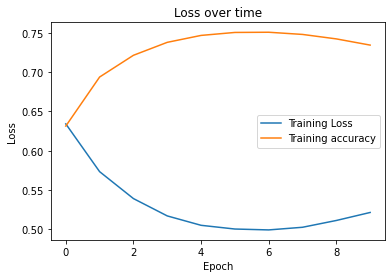

In [1097]:
plt.plot(range(10), model_5.history.history['loss'], label="Training Loss")
plt.plot(range(10), model_5.history.history['acc'], label="Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.legend()

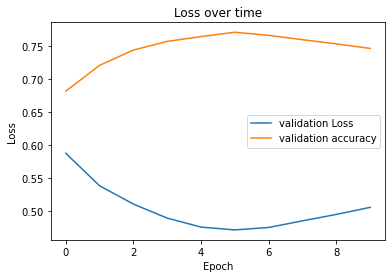

In [1096]:
plt.plot(range(10), model_5.history.history['val_loss'], label="validation Loss")
plt.plot(range(10), model_5.history.history['val_acc'], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.legend()

## LSTM WITH ATTENTION

In [1098]:
class Attention_(tf.keras.layers.Layer):

    def __init__(self, units=256, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):
        """
        Many-to-one attention mechanism for Keras.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim this is our case is 256).
        @author: felixhao28, philipperemy.
        """
        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])
        # Inside dense layer
        #              hidden_states            dot               W            =>           score_first_part
        # W is the trainable weight matrix of attention Luong's multiplicative style score
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        #            score_first_part           dot        last_hidden_state     => attention_weights
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        # (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector



In [1109]:
from tensorflow.keras.layers import Lambda, Dot, Concatenate, Activation

In [1110]:
shape = X_con.shape[1]
def create_model_attention(shape):
    ip = Input(shape =(shape,1))
    Dense1 = Dense(64, activation = 'relu')(ip)
    Dense2 = Dense(128, activation = 'relu')(Dense1)
    lstm_1=  LSTM(256, return_sequences = True)(Dense2)
    drop = Dropout(0.2)(lstm_1)
    lstm_3=  LSTM(256, return_sequences = True)(drop)
    drop2 = Dropout(0.2)(lstm_3)
    att_ = Attention_(256)(drop2)
    #att_ = Attention()(lstm_3)
    Dense_1 = Dense(128, activation = 'relu')(att_)
    outputs = Dense(1, activation='sigmoid')(Dense_1)
    model = tf.keras.Model(ip, outputs)

    model.compile(optimizer='adam',
                  loss="binary_crossentropy", metrics=["acc"])
    
    return model

In [1111]:
model_atten = create_model_attention(shape)

In [1112]:
model_atten.summary()

Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_56 (InputLayer)           [(None, 21, 1)]      0                                            
__________________________________________________________________________________________________
dense_161 (Dense)               (None, 21, 64)       128         input_56[0][0]                   
__________________________________________________________________________________________________
dense_162 (Dense)               (None, 21, 128)      8320        dense_161[0][0]                  
__________________________________________________________________________________________________
lstm_114 (LSTM)                 (None, 21, 256)      394240      dense_162[0][0]                  
___________________________________________________________________________________________

In [1114]:
model_atten.fit(train_dataset_new, epochs = 10,validation_data = validation_dataset,  callbacks=[callback])
model_atten.save_weights("/Users/hritvikgupta/Downloads/model_atten.h5")

Epoch 1/10
21727/21727 [==============================] - 1289s 59ms/step - loss: 0.6569 - acc: 0.6059 - val_loss: 0.6363 - val_acc: 0.6333
Epoch 2/10
21727/21727 [==============================] - 426s 19ms/step - loss: 0.6243 - acc: 0.6453 - val_loss: 0.6149 - val_acc: 0.6488
Epoch 3/10
21727/21727 [==============================] - 738s 34ms/step - loss: 0.5974 - acc: 0.6738 - val_loss: 0.5766 - val_acc: 0.6918
Epoch 4/10
21727/21727 [==============================] - 1109s 51ms/step - loss: 0.5760 - acc: 0.6935 - val_loss: 0.5571 - val_acc: 0.7051
Epoch 5/10
21727/21727 [==============================] - 2528s 116ms/step - loss: 0.5611 - acc: 0.7058 - val_loss: 0.5457 - val_acc: 0.7140
Epoch 6/10
21727/21727 [==============================] - 2538s 117ms/step - loss: 0.5481 - acc: 0.7152 - val_loss: 0.5305 - val_acc: 0.7286
Epoch 7/10
21727/21727 [==============================] - 1524s 70ms/step - loss: 0.5344 - acc: 0.7262 - val_loss: 0.5209 - val_acc: 0.7397
Epoch 8/10
21727/217

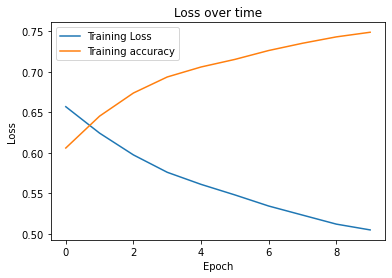

In [1115]:
plt.plot(range(10), model_atten.history.history['loss'], label="Training Loss")
plt.plot(range(10), model_atten.history.history['acc'], label="Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.legend()

## VISUALIZING AND COMPARING THE 3 MODELS

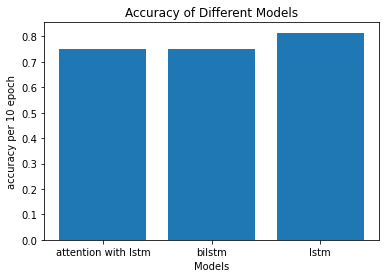

In [1137]:
atten = max(model_atten.history.history['acc'])
bilstm = max(model_5.history.history['acc'])
lstm = max(model_3.history.history['acc'])

X = ['attention with lstm', 'bilstm' , 'lstm']
y = [atten, bilstm, lstm]

plt.bar(X,y)
plt.xlabel('Models')
plt.ylabel("accuracy per 10 epoch")
plt.title("Accuracy of Different Models")
plt.show()

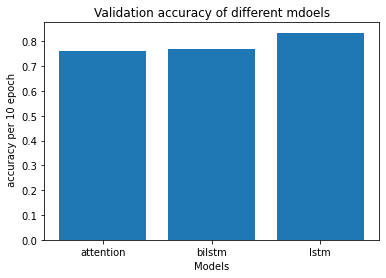

In [1135]:
atten = max(model_atten.history.history['val_acc'])
bilstm = max(model_5.history.history['val_acc'])
lstm = max(model_3.history.history['val_acc'])
X = ['attention', 'bilstm' , 'lstm']
y = [atten, bilstm, lstm]
plt.bar(X,y)
plt.xlabel('Models')
plt.ylabel(" accuracy per 10 epoch")
plt.title("Validation accuracy of different mdoels")
plt.show()

# The END

In [887]:
import pyeeg

def BandPower( x , fq):

    fs = fq
    band = [1,4,8,12,30, 35]

    resp =pyeeg.bin_power(x,band,fs)
    
    return resp




In [813]:
BandPower(X_con[0])

(array([ 0.        ,  0.        , 30.86404309, 61.63365951,  0.        ]),
 array([0.        , 0.        , 0.33367362, 0.66632638, 0.        ]))

In [ ]:
da

In [812]:
np.expand_dims(X_con[0],axis = 0)

array([[-5.93329962, -5.78742741, -6.39611556, -2.66884993, -3.38454706,
        -4.63583099, -2.94892495,  4.10551838, -2.85868581,  0.33638989,
         3.78535819,  6.82107838,  3.7628896 ,  9.12440591,  4.61822473,
         9.59794522, -2.61980243, 11.50313364,  8.24712701, -0.62596111,
         6.82141702]])

In [764]:
y1 = X_con.T

In [766]:
y1, X_con

(array([[-5.93329962e+00, -6.48122560e+00, -6.39778567e+00, ...,
          6.43009384e-04,  6.43009384e-04,  6.43009384e-04],
        [-5.78742741e+00, -6.12816336e+00, -5.41006404e+00, ...,
         -1.88350530e-03, -1.88350530e-03, -1.88350530e-03],
        [-6.39611556e+00, -8.92823482e+00, -1.05212866e+01, ...,
         -7.57976501e-04, -7.57976501e-04, -7.57976501e-04],
        ...,
        [ 8.24712701e+00,  1.37356232e+01,  1.72248143e+01, ...,
          4.24555123e-04,  4.24555123e-04,  4.24555123e-04],
        [-6.25961110e-01,  1.31551344e-01,  8.75917744e-01, ...,
         -3.66863508e-04, -3.66863508e-04, -3.66863508e-04],
        [ 6.82141702e+00, -1.88998444e+01, -4.17592237e+01, ...,
          2.14605936e-03,  2.14605936e-03,  2.14605936e-03]]),
 array([[-5.93329962e+00, -5.78742741e+00, -6.39611556e+00, ...,
          8.24712701e+00, -6.25961110e-01,  6.82141702e+00],
        [-6.48122560e+00, -6.12816336e+00, -8.92823482e+00, ...,
          1.37356232e+01,  1.31551344e

In [895]:
int(d1.shape[0]/341)*21, int(d2.shape[0]/1000)*21, 

(1911, 651)

In [883]:
d1 = data[1].to_data_frame()
d1.drop('time', axis = 1, inplace = True)
d2 = data_after[1].to_data_frame()
d2.drop('time', axis = 1, inplace = True)

In [888]:

bands = []
for i in d1.columns:
    k = 0
    for j in range(int(d1.shape[0]/1)-1):
        y = BandPower(d1[i][k:k+1000], 170.5)[0]
        k = k+1000
        bands.append(y)

In [896]:
data

[<RawEDF | Subject00_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject01_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject02_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject03_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject04_1.edf, 21 x 28985 (170.0 s), ~4.7 MB, data loaded>,
 <RawEDF | Subject05_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject06_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject07_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject08_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject09_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject10_1.edf, 21 x 32054 (188.0 s), ~5.2 MB, data loaded>,
 <RawEDF | Subject11_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject12_1.edf, 21 x 31031 (182.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Subject13_1.edf, 21 x 31031 (182.0 s), ~

In [907]:
def bands_data(data, fq):
    new_dataframe = []
    for k in data:
        bands = []
        for i in k.to_data_frame().columns:
            z = 0
            for j in range(int(k.to_data_frame().shape[0]/1000)-1):
                y = BandPower(k.to_data_frame()[i][z:z+1000], fq)[0]
                z = z+1000
                bands.append(y)
        new_dataframe.append(pd.DataFrame(bands))
    return new_dataframe


In [908]:
bands_data(data, 170.5)

[                0              1              2              3              4
 0    1.500892e+06  658484.337119  397562.582862  879350.948827  157184.247427
 1    1.500890e+06  658489.214041  397531.771005  879368.806624  157188.123807
 2    1.500884e+06  658493.542431  397537.337079  879493.716309  157196.146243
 3    1.500900e+06  658475.809776  397557.764145  879520.935614  157219.518528
 4    1.500888e+06  658493.211803  397533.331679  879554.879973  157197.821448
 ..            ...            ...            ...            ...            ...
 655  1.705823e+05  143614.544934  155973.408378  303530.194007   21254.559949
 656  1.841944e+05  164040.100129  174014.868160  334213.060544   21620.688442
 657  1.789619e+05  163491.794834  164757.771095  312125.547026   20962.188253
 658  1.658920e+05  183049.231333  180927.503820  336932.451638   22870.125146
 659  1.471864e+05  171194.503277  175052.423690  318241.268244   20432.730902
 
 [660 rows x 5 columns],
                 0       

In [1045]:
def band_power_dataset(data, fq, start, stop):
    data_resampling(data, fq, start, stop)
    dataframe_final_all = []
    for b in data:
        d2 = b.to_data_frame()
        d2.drop('time', axis = 1, inplace = True)
        row_band = []
        for i in d2.columns:
            bands2 = []
            k = 0
            for j in range(int(d2.shape[0]/1000)-1):
                y = BandPower(d2[i][k:k+1000],fq)[0]
                k = k+1000
                bands2.append(y)
            row_band.append(pd.DataFrame(bands2))
            dataframe_final = pd.concat(row_band, axis = 1)
        dataframe_final_all.append(dataframe_final)
        

    return pd.concat(dataframe_final_all,axis = 0)
def create_train_test(data_final, data_final_after):
    dataframe = pd.concat([data_final, data_final_after])
    dataframe.rename(columns = {'0':'alpha', '1': 'beta,', '2': 'delta', '3': 'theta', '4' : 'gamma'}, inplace = True)
    X_con = dataframe.drop('labels', axis = 1)
    y_con = dataframe['labels']
    y_con = np.array(y_con)
    X_con = np.array(X_con)
    print(X_con.shape, y_con.shape)
    dataset = tf.data.Dataset.from_tensor_slices((X_con,y_con))
    Datset_Size = X_con.shape[0]
    train_size = int(0.85*Datset_Size)
    test_size = int(0.15*Datset_Size)
    
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)
    #validation_dataset = remaining_dataset.take(validation_size)
    #test_dataset = remaining_dataset.skip(validation_size)

    train_dataset  = train_dataset.shuffle(len(train_dataset))
    train_dataset = train_dataset.batch(32)

    
    return train_dataset,test_dataset, X_con, y_con, dataframe




In [1054]:
row_band

[           0         1         2         3         4
 0   0.364378  0.242764  0.135887  0.220519  0.036453
 1   0.337770  0.233900  0.160282  0.226324  0.041724
 2   0.378142  0.168843  0.127442  0.266971  0.058602
 3   0.194086  0.138552  0.185145  0.408507  0.073711
 4   0.157184  0.170947  0.176348  0.434954  0.060567
 5   0.254237  0.267493  0.162031  0.253443  0.062796
 6   0.246473  0.192236  0.191814  0.310763  0.058714
 7   0.299543  0.213143  0.128299  0.333973  0.025042
 8   0.225387  0.277199  0.240333  0.219707  0.037374
 9   0.327252  0.152240  0.193954  0.263645  0.062908
 10  0.326580  0.277663  0.128825  0.226803  0.040128
 11  0.192335  0.221611  0.195782  0.326276  0.063997
 12  0.244162  0.233126  0.203368  0.279740  0.039604
 13  0.281701  0.190738  0.134648  0.326668  0.066244
 14  0.232940  0.212548  0.153582  0.312538  0.088392
 15  0.431068  0.188385  0.103146  0.234759  0.042642
 16  0.262930  0.253545  0.158626  0.285595  0.039304
 17  0.185189  0.258004  0.1

In [1028]:
data_final = band_power_dataset(data, 170.5, 0, 16)

In [1029]:
data_final_after = band_power_dataset(data_after, 500 , 0, 16)

In [1055]:
data_final

,0,1,2,3,4,0,1,2,3,4,...,1,2,3,4,0,1,2,3,4,labels
0,11092.823378,9176.525329,11813.393453,21053.304792,3041.820664,12801.061827,10503.943234,14164.858088,25576.708928,4098.887113,...,3714.125415,4762.736316,8585.742659,982.354739,141214.876461,154476.543876,164708.776263,294456.589350,21710.648195,0
1,12060.729220,8803.532871,14368.800832,26193.359598,2591.486720,14211.355863,10782.420131,16134.902276,31648.343815,3455.530495,...,3444.712754,5837.837427,10349.145747,1181.845781,164538.738788,173774.131019,175228.110768,347897.865883,22363.060662,0
2,13783.517278,12018.402024,19834.311846,25571.187281,3561.885883,12236.967429,14127.235783,22335.908119,28681.130593,4902.958606,...,4458.261324,6939.295556,10445.179094,1116.105805,168266.352601,142525.415221,165362.554308,334559.371876,21467.796725,0
3,9539.917415,9037.254665,14763.050568,20288.579609,3047.595447,13027.225195,10845.277123,15861.506079,24822.437411,4262.363605,...,3639.228990,5039.797097,8357.798101,987.097572,172370.111280,154486.602848,178339.256517,350005.923823,22149.477854,0
4,11246.579610,9779.626993,14138.312804,17130.664320,3097.680410,12575.023026,11083.130030,15377.506267,21212.065749,4756.362932,...,3166.224912,4552.361356,8460.745086,875.492735,190793.882952,157874.852795,165572.875845,310251.926417,23129.436055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,10894.993243,15491.135012,17620.898701,21192.509282,2206.218959,19433.874311,17761.442449,15521.479775,20073.606053,2991.149662,...,6848.422665,7624.165293,14264.889441,2445.920101,173490.518433,90613.919629,110771.392077,337298.426263,28823.748490,0
26,12254.272532,11015.026014,17986.377743,24479.490394,2848.531027,25468.187627,13441.555792,18782.195744,25817.136927,2864.534315,...,8404.939027,7655.051104,14423.856847,2655.485185,159361.283363,102164.450240,112678.105836,337736.766055,25996.339668,0
27,9934.859980,12059.695295,14891.250613,21889.146015,2266.594794,25905.374391,10201.321044,15266.001850,20866.466498,2526.173293,...,9149.549464,6576.774994,14635.311673,2388.609456,139224.577929,86825.752512,109249.573168,318469.636084,24345.045118,0
28,12483.891327,13208.014154,16884.331464,26072.691323,3707.107827,39031.325622,14134.963575,17137.309614,23975.325345,3192.916380,...,8031.644068,7325.285862,14938.706433,2688.544972,162935.039082,92231.305337,114413.209140,322832.187341,28127.255607,0


In [1047]:
data_final['labels'] = 0

data_final_after['labels'] = 1

train_dataset,test_dataset, X_con, y_con, dataframe = create_train_test(data_final, data_final_after)

(958, 105) (958,)


In [1050]:
dataframe.rename(columns = {'0':'alpha', '1': 'beta,', '2': 'delta', '3': 'theta'})

,0,1,2,3,4,0,1,2,3,4,...,1,2,3,4,0,1,2,3,4,labels
0,11092.823378,9176.525329,11813.393453,21053.304792,3041.820664,12801.061827,10503.943234,14164.858088,25576.708928,4098.887113,...,3714.125415,4762.736316,8585.742659,982.354739,141214.876461,154476.543876,164708.776263,294456.589350,21710.648195,0
1,12060.729220,8803.532871,14368.800832,26193.359598,2591.486720,14211.355863,10782.420131,16134.902276,31648.343815,3455.530495,...,3444.712754,5837.837427,10349.145747,1181.845781,164538.738788,173774.131019,175228.110768,347897.865883,22363.060662,0
2,13783.517278,12018.402024,19834.311846,25571.187281,3561.885883,12236.967429,14127.235783,22335.908119,28681.130593,4902.958606,...,4458.261324,6939.295556,10445.179094,1116.105805,168266.352601,142525.415221,165362.554308,334559.371876,21467.796725,0
3,9539.917415,9037.254665,14763.050568,20288.579609,3047.595447,13027.225195,10845.277123,15861.506079,24822.437411,4262.363605,...,3639.228990,5039.797097,8357.798101,987.097572,172370.111280,154486.602848,178339.256517,350005.923823,22149.477854,0
4,11246.579610,9779.626993,14138.312804,17130.664320,3097.680410,12575.023026,11083.130030,15377.506267,21212.065749,4756.362932,...,3166.224912,4552.361356,8460.745086,875.492735,190793.882952,157874.852795,165572.875845,310251.926417,23129.436055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,5018.529070,5343.881099,3789.229899,10555.104545,1336.274093,15011.009766,5617.003537,3642.790240,12875.424521,1838.086820,...,3096.170257,3093.206015,11655.269349,1734.318080,101618.393847,73148.565636,78249.768560,219207.282606,18991.485138,1
26,6620.676805,5519.504773,3842.432053,11248.310724,1505.225726,12967.094344,9970.707216,5518.715613,10715.710701,2231.257162,...,4588.178844,3387.799054,9102.966842,1473.184840,100833.933339,74662.128474,61851.159920,184609.730498,15805.190755,1
27,5642.865375,7029.541612,5776.782898,10555.587110,1195.209584,11734.945848,7183.529260,5725.232144,12890.183145,2245.269181,...,4265.809186,4584.363420,10814.846624,1778.809689,121198.935086,72580.139841,74872.440836,228558.698122,20843.591146,1
28,6835.603151,4676.181691,6218.445600,13643.970916,2293.560623,22047.651831,6962.828680,8117.968794,18934.332798,2827.579635,...,2722.017192,5151.061824,11174.102445,1960.785636,114234.311847,73332.371087,71740.496115,232495.320067,17532.610889,1


In [1032]:
X_con.shape[1], shape

(105, 105)

In [1033]:
model_bands = create_model(shape)

In [1034]:
model_bands.summary()

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 105, 1)]          0         
_________________________________________________________________
dense_134 (Dense)            (None, 105, 64)           128       
_________________________________________________________________
dense_135 (Dense)            (None, 105, 128)          8320      
_________________________________________________________________
lstm_103 (LSTM)              (None, 105, 256)          394240    
_________________________________________________________________
dropout_42 (Dropout)         (None, 105, 256)          0         
_________________________________________________________________
lstm_104 (LSTM)              (None, 256)               525312    
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0  

In [1035]:
train_dataset

<BatchDataset shapes: ((None, 105), (None,)), types: (tf.float64, tf.int64)>

In [1036]:
model_bands.fit(train_dataset, epochs = 10, callbacks=[callback])

Epoch 1/10
26/26 [==============================] - 3s 64ms/step - loss: 0.6828 - acc: 0.6038
Epoch 2/10
26/26 [==============================] - 2s 65ms/step - loss: 0.6872 - acc: 0.5577
Epoch 3/10
26/26 [==============================] - 2s 62ms/step - loss: 0.6903 - acc: 0.5776
Epoch 4/10
26/26 [==============================] - 2s 62ms/step - loss: 0.6900 - acc: 0.5399
Epoch 5/10
26/26 [==============================] - 2s 62ms/step - loss: 0.6837 - acc: 0.5677


In [701]:
#!pip install git+https://github.com/forrestbao/pyeeg.git

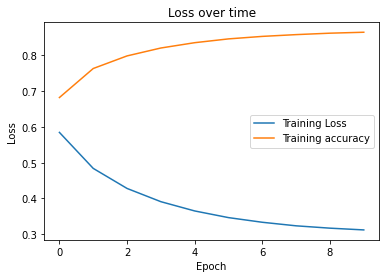

In [583]:
plt.plot(range(10), model_2.history.history['loss'], label="Training Loss")
plt.plot(range(10), model_2.history.history['acc'], label="Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.legend()

In [1056]:
from tensorflow.keras.layers import GRU

In [1069]:
shape = X_con.shape[1]
def create_model_GRU(shape):
    ip = Input(shape =(shape,1))
    Dense1 = Dense(64, activation = 'relu')(ip)
    Dense2 = Dense(128, activation = 'relu')(Dense1)
    lstm_1=  GRU(256, return_sequences = True)(Dense2)
    drop = tf.keras.layers.Dropout(0.2)(lstm_1)
    lstm_3=  GRU(256)(drop)
    drop2 = tf.keras.layers.Dropout(0.2)(lstm_3)
    Dense_3= Dense(128, activation = 'relu')(drop2)
    outputs = Dense(1, activation='sigmoid')(Dense_3)

    model = tf.keras.Model(ip, outputs)

    model.compile(optimizer='adam',
                  loss="binary_crossentropy", metrics=["acc"])
    
    return model

In [1070]:
model_GRU = create_model_GRU(shape)

In [1071]:
model_GRU.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 21, 1)]           0         
_________________________________________________________________
dense_142 (Dense)            (None, 21, 64)            128       
_________________________________________________________________
dense_143 (Dense)            (None, 21, 128)           8320      
_________________________________________________________________
gru_2 (GRU)                  (None, 21, 256)           296448    
_________________________________________________________________
dropout_46 (Dropout)         (None, 21, 256)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dropout_47 (Dropout)         (None, 256)               0  

In [1072]:
model_GRU.fit(train_dataset_new, epochs = 10,validation_data = validation_dataset,  callbacks=[callback])

Epoch 1/10
  412/21727 [..............................] - ETA: 45:17 - loss: 0.7031 - acc: 0.5263

KeyboardInterrupt: 